**id** - Unique ID for each home sold<br>
**date** - Date of the home sale<br>
**price** - Price of each home sold<br>
**bedrooms** - Number of bedrooms<br>
**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower<br>
**sqft_living** - Square footage of the apartments interior living space<br>
**sqft_lot** - Square footage of the land space<br>
**floors** - Number of floors<br>
**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not<br>
**view** - An index from 0 to 4 of how good the view of the property was<br>
**condition** - An index from 1 to 5 on the condition of the apartment.<br>
**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.<br>
**sqft_above** - The square footage of the interior housing space that is above ground level<br>
**sqft_basement** - The square footage of the interior housing space that is below ground level<br>
**yr_built** - The year the house was initially built<br>
**yr_renovated** - The year of the house’s last renovation<br>
**zipcode** - What zipcode area the house is in<br>
**lat** - Lattitude<br>
**long** - Longitude<br>
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbour<br>
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors<br>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('House.csv')

In [3]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.view.unique(),df.waterfront.unique(),df.condition.unique(),df.grade.unique()

(array([0, 3, 4, 2, 1]),
 array([0, 1]),
 array([3, 5, 4, 1, 2]),
 array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1]))

We see that there are cases where the number of bedrooms < the number of bathrooms. We shall remove such anomalies.<br>  
We also see that some of the bathroom numbers have decimal value.<br> 
**Full Bathroom** -->Adjoins the MasterBedroom and has Bathtub/Shower, Toilet, Sink<br> 
**1/2 Bathroom** --> Toilet and Sink<br> 
**3/4 Bathroom** --> Toilet, Sink and Shower<br> 

In [6]:
df1 = df[df.bathrooms<df.bedrooms+1]
df1.shape

(21523, 21)

In [7]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.152300e+04,2.152300e+04,21523.000000,21523.000000,21523.000000,2.152300e+04,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000,21523.000000
mean,4.582575e+09,5.364137e+05,3.373182,2.106665,2072.109278,1.491133e+04,1.492403,0.007248,0.230544,3.410212,7.649073,1782.354365,289.754913,1970.941876,83.736422,98077.966454,47.559920,-122.214007,1983.373089,12677.102727
std,2.877437e+09,3.528906e+05,0.926401,0.755480,897.314099,4.018183e+04,0.539104,0.084828,0.759172,0.651078,1.164766,814.459780,438.252041,29.367106,400.164646,53.515275,0.138682,0.140738,681.181839,26562.518120
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,3.210000e+05,3.000000,1.500000,1420.000000,5.042500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470300,-122.328000,1490.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571600,-122.231000,1840.000000,7620.000000
75%,7.312200e+09,6.405000e+05,4.000000,2.500000,2540.000000,1.065100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2209.000000,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10078.000000
max,9.900000e+09,7.062500e+06,33.000000,7.500000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Max** value of **bedroom** = 33.<br>
This is clearly an **outlier**. Let's get rid of it.

In [9]:
df2 = df1[df1['bedrooms']!=33]

In [10]:
df2[df2.sqft_living>df2.sqft_lot].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
63,9528102996,20141207T000000,549000.0,3,1.75,1540,1044,3.0,0,0,3,8,1540,0,2014,0,98115,47.6765,-122.320,1580,3090
116,3362400431,20140626T000000,518500.0,3,3.50,1590,1102,3.0,0,0,3,8,1590,0,2010,0,98103,47.6824,-122.347,1620,3166
175,7234600798,20150210T000000,425000.0,3,2.50,1120,1100,2.0,0,0,3,8,820,300,2008,0,98122,47.6106,-122.310,1590,1795
406,7821200390,20140806T000000,450000.0,3,2.00,1290,1213,3.0,0,0,3,8,1290,0,2001,0,98103,47.6609,-122.344,1290,3235
547,7899800860,20150319T000000,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928


--> Area of **House**> Area of **Land** it is built on.<br>
We shall remove such datas.

In [11]:
df2 = df2[df2.sqft_living<df2.sqft_lot]

In [12]:
df2.shape

(20744, 21)

**Let's see if the year a house was built on has any impact on it's average price**. 

In [13]:
y = pd.DataFrame(df2.groupby('yr_built').price.mean())
y.reset_index(inplace=True)

In [14]:
y.head()

,yr_built,price
0,1900,566890.435294
1,1901,548969.357143
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444


<IPython.core.display.Javascript object>

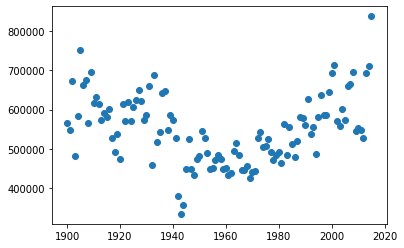

In [15]:
plt.scatter(y['yr_built'],y['price'])

There seems to be no coorelation between <b>yr_built</b> and **price**. We shall remove the column later. 

In [16]:
df3 = df2

In [17]:
df3[df3['bedrooms']==0].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
6994,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
14423,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600


**We've got houses with 0 bathrooms and 0 bedrooms but multiple floors. Clearly these data points are anomalies. Let's get rid of them.**

In [18]:
#Select all datas where bedrooms !=0.
df3=df3[df3['bedrooms']!=0]

In [19]:
#Select all datas where bathrooms !=0.
df3=df3[df3['bathrooms']!=0]

In [20]:
df3.shape

(20734, 21)

In [21]:
df4=df3

In [22]:
df4['renovated']=df4['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

In [23]:
df4.shape

(20734, 22)

In [24]:
features =["bedrooms","bathrooms","sqft_lot","waterfront","view","grade","sqft_above","sqft_basement","renovated",
          "lat","long"]   
X=df4[features ]
y=df4['price']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
X_test.tail()

,bedrooms,bathrooms,sqft_lot,waterfront,view,grade,sqft_above,sqft_basement,renovated,lat,long
15543,3,2.25,9775,0,0,7,1470,670,0,47.3060,-122.379
9329,4,2.25,31584,0,0,9,2510,0,0,47.6153,-122.054
20574,2,1.50,1525,0,0,7,1020,0,0,47.7040,-122.347
19100,3,1.00,4250,0,0,7,840,150,0,47.5392,-122.390
10089,3,2.00,8450,0,0,7,1230,0,0,47.7548,-122.305


In [29]:
y_test

18133    762400.0
2494     322000.0
5314     635000.0
14916    367000.0
11608    835000.0
           ...   
15543    210000.0
9329     605000.0
20574    212000.0
19100    399000.0
10089    383610.0
Name: price, Length: 2074, dtype: float64

In [30]:
regressor.predict([[3,1.75,14607,0,1,8,1230,1200,1,47.5588,-122.211]])

array([784223.88878234])

In [31]:
y_pred=regressor.predict(X_test)

In [32]:
from sklearn import metrics

In [33]:
mse=metrics.mean_squared_error(y_test,y_pred)
mse

46422357025.078636

In [34]:
regressor.score(X_test,y_test)

0.6625825461038148

In [35]:
regressor.score(X_train,y_train)

0.6672906317889641

In [36]:
regressor.coef_

array([-2.25698881e+04, -1.35860921e+04,  8.43667068e-02,  5.68703880e+05,
        6.23015948e+04,  8.41412067e+04,  1.94689127e+02,  1.85215217e+02,
        1.05303143e+05,  6.41058635e+05, -2.30689060e+05])

In [37]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-22569.888082
bathrooms,-13586.092082
sqft_lot,0.084367
waterfront,568703.880037
view,62301.594776
grade,84141.206662
sqft_above,194.689127
sqft_basement,185.215217
renovated,105303.143169
lat,641058.634810


Interpreting the coefficients:

- Holding all other features fixed, a <b>1</b> unit increase in <b>bathrooms</b> is associated with a **decrease** of <b>-13586.092</b> in price.


In [38]:
from numpy import cov
covariance = cov(df4['bathrooms'],df4['price'])
print(covariance)

[[5.74252495e-01 1.39632249e+05]
 [1.39632249e+05 1.27384247e+11]]


<b>We see that there is a +ve correlation between bathrooms and prices. However, upon training the model, we find that house prices are decreasing as number of bathrooms are incereasing. This can happen in a multivariate regression model.</b>

We'll use **Regulation** techniques to improve on the accuracy. 

In [39]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.15) 
RidgeModel.fit(X_train, y_train)
RidgeModel.score(X_test, y_test)

0.6625785324878548

In [40]:
RidgeModel.predict([[3,1.75,14607,0,1,8,1230,1200,1,47.5588,-122.211]])

array([784277.47225723])

In [41]:
prediction=RidgeModel.predict(X_test)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 136662.6570093247
MSE: 46422909223.87839
RMSE: 215459.76242416678


Using **Rigid Regression** didn't improve the model's accuracy. So we will try with polynomial regression. 

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly_reg = PolynomialFeatures(degree=2)

In [45]:
X_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [46]:
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly, y_train)
lin_reg2.score(X_test_poly,y_test)

0.7582475224812364

In [47]:
lin_reg2.predict(poly_reg.transform([[3,1.75,14607,0,1,8,1230,1200,1,47.5588,-122.211]]))

array([788055.66615689])

Let's try **Rigid Regression** for this as well.

In [48]:
RidgeModel_2 = Ridge(alpha=0.2) 
RidgeModel_2.fit(X_poly, y_train)
RidgeModel_2.score(X_test_poly,y_test)

0.7547901698996495

In [49]:
RidgeModel_2.predict(poly_reg.transform([[3,1.75,14607,0,1,8,1230,1200,1,47.5588,-122.211]]))

array([790394.88921942])

**NOTE**: Accuracy score is not a proper **Evaluation Metrics** for any type of regression models. They are mostly used in **classification** models.

In [50]:
prediction=RidgeModel_2.predict(X_test_poly)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, and we want to minimize them.

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 117427.01595954012
MSE: 33736305420.879833
RMSE: 183674.4550036282


In [52]:
prediction=lin_reg2.predict(X_test_poly)

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 116093.98831251444
MSE: 33260638101.211834
RMSE: 182374.99308077255


In [54]:
def pred(floors,lat,bedrooms,sqft_lot,view,bathrooms,sqft_above,grade,sqft_living,presence_of_basement,presence_of_renovation):
    new_data = [[floors,lat,bedrooms,sqft_lot,view,bathrooms,sqft_above,grade,sqft_living,presence_of_basement,presence_of_renovation]]
    return (lin_reg2.predict(poly_reg.transform(new_data)))

In [55]:
pred(3,1.75,14607,0,1,8,1230,1200,1,47.5588,-122.211)

array([788055.66615689])

In [56]:
import pickle
import pickle
pickle.dump(RidgeModel,open('model.pkl','wb'))